<a href="https://colab.research.google.com/github/riotrip/ml-smt5/blob/main/UTS_2341720236_Rio_Tri_Prayogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

Download dataset pada https://storage.googleapis.com/kuliah_mah/UTS2526.zip dan gunakan data sesuai dengan studi kasus yang didapatkan

# Studi Kasus 1 - House Price Clustering

- Untuk mahasiswa dengan absen 1, 4, 7, 10, dst
- Lakukan beberapa tahapan berikut dan lakukan proses analisis terhadap hasil yang dihasilkan.

## Pra Pengolahan Data (30 poin)

1. Load dataset. (5 poin)
2. Drop kolom 'Id' dan 'MSSubClass' (5 poin)
3. Drop semua variabel kualitatif (5 poin)
4. Drop variabel dengan nilai kosong kurang dari 5 (5 poin)
5. Lakukan data imputation pada data yang kosong. Lampirkan analisis Anda mengapa menggunakan metode impute tersebut. (10 poin)

## Feature Selection (20 poin)
1. Pilih 10 variabel terbaik menurut Anda dari seluruh variabel yang ada. (10 poin)
2. Bagaimana cara Anda memilih 10 variabel tersebut? Kemukakan alasan Anda. (10 poin)

## Clustering - 1 (30 poin)

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)
2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)
3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

NB: Anda diperbolehkan untuk melakukan proses normalisasi/standardisasi sebelum pembuatan model clustering. Lakukan pengamatan terhadap hasil clustering.

## Clustering - 2 (20 poin)

1. Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan? (10 poin)
2. Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN? (10 poin)

## BONUS - CHALLENGE (30 poin)

Lakukan proses seleksi fitur. Kombinasi fitur apa saja yang menghasilkan cluster dengan nilai silhouette / DBI terbaik? Berapa jumlah clusternya?

NB: Anda dapat menggunakan iteravie process pada kasus ini. Metode lain juga diperbolehkan. Berikan alasan mengapa Anda memilih metode tersebut.

# **Rio Tri Prayogo - 2341720236 - TI 3F/25**
---
## **Studi Kasus 1 - House Price Clustering**

### Persiapan

Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

### Pra Pengolahan Data (30 poin)


1. Load dataset. (5 poin)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PembelajaranMesin_Rio/docs/1_house_prince_advance.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


2. Drop kolom 'Id' dan 'MSSubClass' (5 poin)

In [4]:
df_processed = df.drop(['Id', 'MSSubClass'], axis=1)
df_processed.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


3. Drop semua variabel kualitatif (5 poin)

In [5]:
qualitative_vars = df_processed.select_dtypes(include=['object']).columns.tolist()
df_numeric = df_processed.drop(qualitative_vars, axis=1)
df_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,192,84,0,0,0,0,0,12,2008,250000.0


4. Drop variabel dengan nilai kosong kurang dari 5 (5 poin)

In [6]:
missing_counts = df_numeric.isnull().sum()
threshold = len(df_numeric) * 0.05
cols_to_drop = missing_counts[missing_counts > threshold].index.tolist()
df_cleaned = df_numeric.drop(cols_to_drop, axis=1)
df_cleaned.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,836.0,192,84,0,0,0,0,0,12,2008


5. Lakukan data imputation pada data yang kosong. Lampirkan analisis Anda mengapa menggunakan metode impute tersebut. (10 poin)

In [7]:
df_imputed = df_cleaned.copy()
for col in df_imputed.columns[df_imputed.isnull().any()]:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

Data imputation disini menggunakan median karena data properti yang berisi banyak jenis rumah dari mewah maupun biasa akan memiliki banyak outlier sehingga median akan lebih sesuai karena mengambil nilai tengahnya.

### Feature Selection (20 poin)

1. Pilih 10 variabel terbaik menurut Anda dari seluruh variabel yang ada. (10 poin)

In [8]:
X_features = df_imputed.copy()

feature_variance = X_features.var().sort_values(ascending=False)
selected_features = feature_variance.index[:10].tolist()

print("10 variabel terbaik berdasarkan varians tertinggi:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature} (varians: {feature_variance[feature]:.2f})")

10 variabel terbaik berdasarkan varians tertinggi:
1. LotArea (varians: 62204711.57)
2. MiscVal (varians: 321945.27)
3. GrLivArea (varians: 256087.66)
4. BsmtFinSF1 (varians: 207511.91)
5. TotalBsmtSF (varians: 194209.64)
6. BsmtUnfSF (varians: 193135.43)
7. 2ndFlrSF (varians: 183784.94)
8. 1stFlrSF (varians: 153948.00)
9. GarageArea (varians: 46379.04)
10. MasVnrArea (varians: 31988.96)


2. Bagaimana cara Anda memilih 10 variabel tersebut? Kemukakan alasan Anda. (10 poin)

Untuk memilih 10 variabel tersebut dengan mengukur varians tertinggi, karena fitur dengan varians tinggi akan lebih mudah membentuk cluster yang terpisah jelas.

### Clustering - 1 (30 poin)

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)

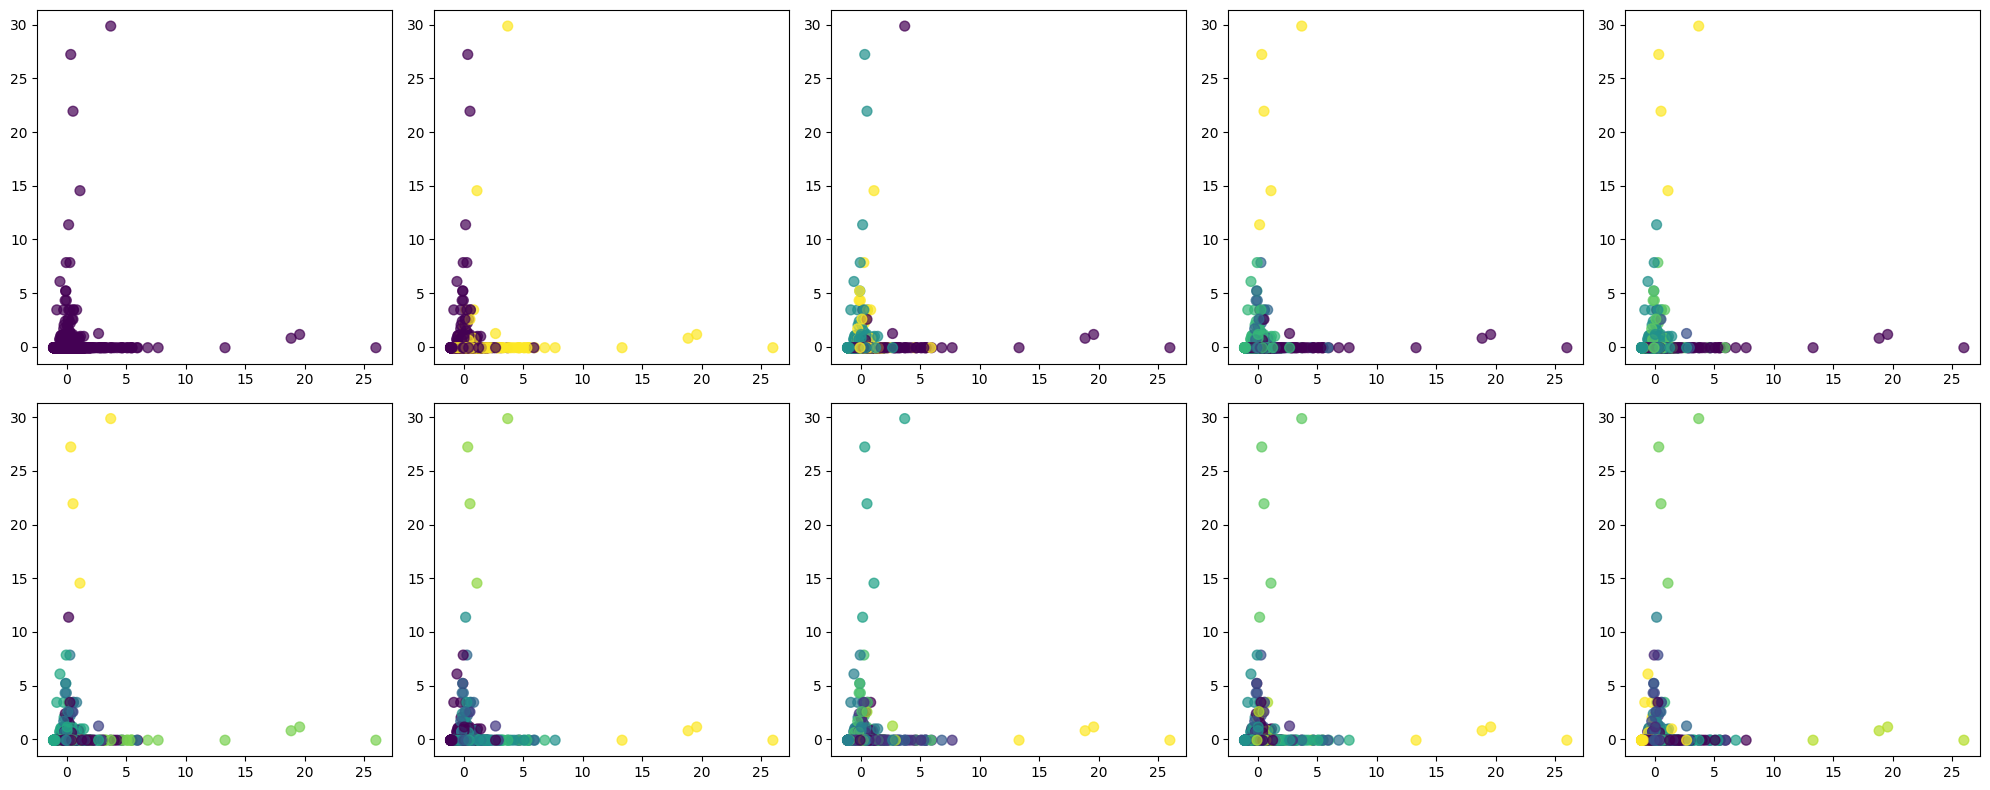

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed[selected_features])

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    ax = plt.subplot(2, 5, k)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, c=labels, cmap='viridis', alpha=0.7)

plt.tight_layout()
plt.show()

2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)

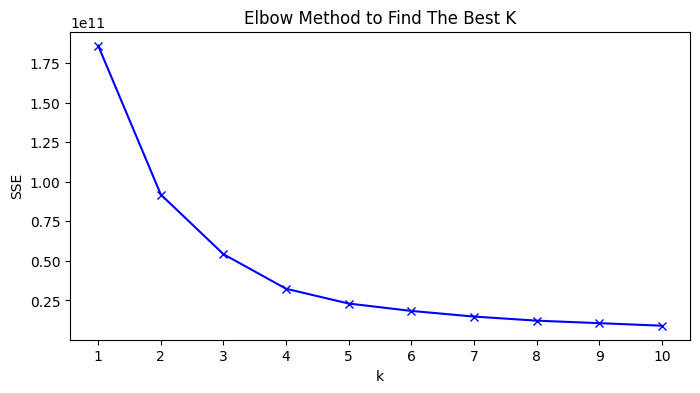

In [10]:
sse = []

K = range(1,11)

for k in K:
 kmeanModel = KMeans(n_clusters=k, n_init=10)
 kmeanModel.fit(df_imputed[selected_features])
 sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.xticks(K)
plt.show()

Nilai K terbaik menurut Elbow Method adalah K=4 karena penurunan dari K=4 ke K=5 tidak terlalu tajam dan diikuti penurunan yang stabil

3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

In [11]:
print("Silhouette Score:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    print(f"{k}\t{silhouette:.4f}")

Silhouette Score:
2	0.2880
3	0.2189
4	0.2078
5	0.2354
6	0.2176
7	0.2206
8	0.2225
9	0.2102
10	0.1944


Nilai K terbaik menurut nilai silhouette coefficient adalah K=2 karena K=2 memiliki nilai tertinggi berupa 0.2880. Untuk K=1 berarti tidak ada "cluster lainnya" untuk dibandingkan, jadi perhitungannya impossible dikarenakan silhouette score sendiri mengukur seberapa baik suatu data point cocok dengan clusternya sendiri dibanding cluster terdekat lainnya.

### Clustering - 2 (20 poin)

1. Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan? (10 poin)

In [12]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Jumlah cluster yang dihasilkan: {n_clusters}")

Jumlah cluster yang dihasilkan: 2


2. Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN? (10 poin)

In [13]:
silhouette = silhouette_score(X_scaled, dbscan_labels)
dbi = davies_bouldin_score(X_scaled, dbscan_labels)

print(f"Silhouette Coefficient: {silhouette:.4f}")
print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")

Silhouette Coefficient: 0.4264
Davies-Bouldin Index (DBI): 1.9363


### BONUS - CHALLENGE (30 poin)
Lakukan proses seleksi fitur. Kombinasi fitur apa saja yang menghasilkan cluster dengan nilai silhouette / DBI terbaik? Berapa jumlah clusternya?

NB: Anda dapat menggunakan iteravie process pada kasus ini. Metode lain juga diperbolehkan. Berikan alasan mengapa Anda memilih metode tersebut.

In [14]:
from itertools import combinations

In [18]:
features = df_imputed[selected_features].columns.tolist()

all_combinations = []
for r in [3, 4]:
    all_combinations.extend(list(combinations(features, r)))

best_combo = None
best_score = -1
best_k = 2

for i, combo in enumerate(all_combinations[:20]):
    combo = list(combo)
    X_combo = X_scaled[:, [features.index(f) for f in combo]]

    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_combo)

        if k == 1:
            continue

        score = silhouette_score(X_combo, labels)

        if score > best_score:
            best_score = score
            best_combo = combo
            best_k = k

print("Fitur Terbaik:")
print(f"Kombinasi fitur: {best_combo}")
print(f"Jumlah cluster: {best_k}")
print(f"Silhouette Score: {best_score:.4f}")

Fitur Terbaik:
Kombinasi fitur: ['LotArea', 'MiscVal', '1stFlrSF']
Jumlah cluster: 2
Silhouette Score: 0.9383


Disini saya menggunakan iterative process dengan memilih 3-4 fitur secara acak menggunakan perulangan, lalu juga memilih jumlah K dari 1-10 yang nantinya menggunakan KMeans untuk menemukan fitur, jumlah cluster dan silhouette score seperti dalam output diatas